In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from cvxpy import *
import bs4 as bs
from urllib.request import Request, urlopen
from pathlib import Path  
from matplotlib.pyplot import figure

In [2]:
def reformat_ticker_dataframe(ticker_history):
    cols = {i:i.replace("_close","") for i in list(ticker_history.columns) if "_close" in i}
    ticker_history = ticker_history[[i for i in list(cols.keys())]]
    ticker_history = ticker_history.rename(columns=cols)
    return ticker_history        

def get_sp_index():
    sp_index_path =  Path('data/sp_index.xlsx')  
    if(sp_index_path.is_file()):
        df = pd.read_excel('data/sp_index.xlsx')
        df = df[["Company","Symbol","Weight","Price", "Chg"]]
    else:
        req = Request('https://www.slickcharts.com/sp500', headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()
        soup = bs.BeautifulSoup(webpage,'lxml')
        table = soup.find('table', attrs={'class':'table table-hover table-borderless table-sm'})
        df = pd.read_html(str(table))[0]
        df = df[["Company","Symbol","Weight","Price","Chg"]]
        df.to_excel("data/sp_index.xlsx")
    return df


def get_ticker_historical(symbol_list):
    ticker_history_file = Path('data/ticker_history.xlsx')  
    if ticker_history_file.is_file():
        print("found")
        ticker_history = pd.read_excel('data/ticker_history.xlsx')
        ticker_history = ticker_history.set_index("Date")
        return reformat_ticker_dataframe(ticker_history.dropna())
    else:     
        print("not found")
        ticker_history = pd.DataFrame(list(), columns=[])   
        for i in symbol_list:
            ticker_df = yf.download(i, start="2015-03-30", end="2022-03-31")[["Close"]]    
            if len(ticker_df) > 500:        
                ticker_df = ticker_df.rename(columns={"Close": f"{i}_close"})
                ticker_history = ticker_df.join(ticker_history) 
                
        ticker_history.to_excel("data/ticker_history.xlsx")
        return reformat_ticker_dataframe(ticker_history.dropna())

In [3]:
sp_index = get_sp_index()
df = get_ticker_historical(list(set(sp_index["Symbol"])))
df

found


,JPM,TAP,KR,PVH,VRTX,LKQ,MU,KIM,ZTS,VRSN,...,SO,NEE,CRL,CCI,GS,CTAS,PSA,KEY,WRB,FBHS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-19,85.300003,38.509998,34.180000,33.900002,215.690002,17.379999,36.290001,10.250000,102.330002,164.600006,...,50.900002,51.775002,108.760002,130.750000,149.490005,183.000000,187.600006,9.350000,32.299999,37.720001
2020-03-20,83.500000,36.939999,31.770000,31.570000,206.000000,16.299999,36.110001,10.630000,100.940002,157.130005,...,46.360001,47.937500,105.779999,128.059998,138.410004,175.089996,171.220001,9.190000,31.719999,36.599998
2020-03-23,79.029999,34.560001,31.080000,29.049999,202.210007,13.900000,38.250000,9.410000,92.660004,151.169998,...,43.230000,45.415001,100.500000,116.980003,134.970001,157.059998,160.610001,8.560000,28.906668,34.830002
2020-03-24,88.430000,37.470001,30.150000,35.520000,223.130005,16.959999,43.270000,10.490000,103.760002,170.529999,...,49.040001,51.632500,110.120003,123.709999,153.600006,173.800003,168.649994,9.770000,32.066666,40.369999
2020-03-25,91.730003,37.540001,27.940001,37.459999,210.089996,20.000000,42.500000,11.190000,108.209999,166.970001,...,50.139999,52.567501,119.349998,127.959999,155.130005,192.330002,176.539993,9.820000,31.680000,42.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-24,140.690002,52.919998,56.750000,81.489998,251.699997,45.400002,78.209999,24.090000,189.570007,215.110001,...,69.300003,83.699997,281.049988,175.309998,336.230011,410.410004,373.119995,23.600000,65.339996,77.570000
2022-03-25,141.919998,53.959999,57.000000,83.720001,253.949997,45.799999,78.099998,24.379999,189.429993,215.750000,...,70.930000,83.940002,279.100006,177.580002,337.489990,413.320007,376.000000,23.889999,65.980003,77.599998
2022-03-28,140.869995,53.349998,57.000000,84.309998,255.720001,45.529999,79.860001,24.379999,189.369995,219.740005,...,71.000000,84.430000,282.679993,180.830002,335.299988,423.239990,383.359985,23.430000,66.260002,77.989998


In [4]:
mp  = df[["MSFT", "TSLA", "AMZN"]]

In [5]:
mp.head()

,MSFT,TSLA,AMZN
Date,,,
2020-03-19,142.710007,85.528000,1880.930054
2020-03-20,137.350006,85.505997,1846.089966
2020-03-23,135.979996,86.858002,1902.829956
2020-03-24,148.339996,101.000000,1940.099976
2020-03-25,146.919998,107.849998,1885.839966


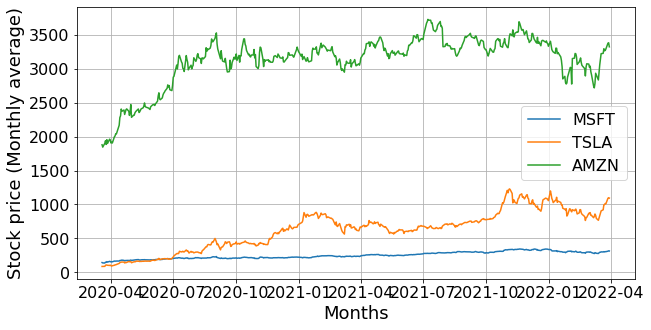

In [6]:
plt.figure(figsize=(10,5))
plt.plot(mp['MSFT'])
plt.plot(mp['TSLA'])
plt.plot(mp['AMZN'])
plt.legend(mp.columns,fontsize=16)
plt.xlabel("Months",fontsize=18)
plt.ylabel("Stock price (Monthly average)",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

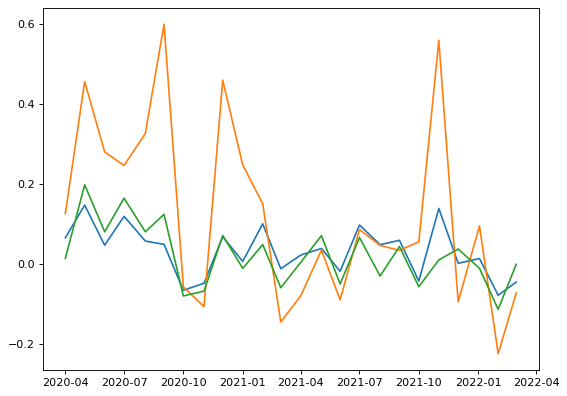

In [7]:
mr = mp.resample('BMS').first()
mr = mr.pct_change().dropna()
figure(figsize=(8, 6), dpi=80)
plt.plot(mr['MSFT'])
plt.plot(mr['TSLA'])
plt.plot(mr['AMZN'])
plt.show()

In [8]:
mr.head()

,MSFT,TSLA,AMZN
Date,,,
2020-04-01,0.065868,0.126087,0.014232
2020-05-01,0.147656,0.456350,0.198323
2020-06-01,0.047316,0.280585,0.080926
2020-07-01,0.119619,0.246665,0.164975
2020-08-03,0.057841,0.326331,0.081005


In [9]:
symbols = mr.columns

In [16]:
r = np.array(list(mr.mean(axis=0)))
C = np.asmatrix(np.cov(mr.T))
for j in range(len(symbols)):
    print ('%s: Exp ret = %f, Risk = %f' %(symbols[j],r[j], C[j,j]**0.5))

MSFT: Exp ret = 0.032569, Risk = 0.063212
TSLA: Exp ret = 0.122618, Risk = 0.229856
AMZN: Exp ret = 0.022722, Risk = 0.077257


In [29]:
# Number of variables
n = len(symbols)

# The variables vector
x = Variable(n)

# The minimum return
req_return = 0.04

# The return
ret = r.T@x

# The risk in xT.Q.x format
risk = quad_form(x, C)

# The core problem definition with the Problem class from CVXPY
constraints = [sum(x)==1, ret >= req_return, x >= 0]
prob = Problem(Minimize(risk), constraints)

try:
    prob.solve()
    print ("Optimal portfolio")
    print ("----------------------")
    for s in range(len(symbols)):
       print (" Investment in {} : {}% of the portfolio".format(symbols[s],round(100*x.value[s],2)))
    print ("----------------------")
    print ("Exp ret = {}%".format(round(100*ret.value,2)))
    print ("Expected risk    = {}%".format(round(100*risk.value**0.5,2)))
except:
    print ("Error")

Optimal portfolio
----------------------
 Investment in MSFT : 91.75% of the portfolio
 Investment in TSLA : 8.25% of the portfolio
 Investment in AMZN : 0.0% of the portfolio
----------------------
Exp ret = 4.0%
Expected risk    = 7.29%


In [19]:
prob.status

'optimal'

In [20]:
x.value

array([9.57234773e-01, 7.83857304e-20, 4.27652268e-02])